In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import pickle
import pandas as pd
import financial.data as fd
import financial.momentum.storeLocalModel as sLM
from financial.momentum.exponentialRegression import ExponentialRegressionModelFactory
from financial.io.file.cache import FileCache


ticker = "AAPL"
cache_path=os.environ["CACHE"]+"/"  
model_name = "exponential"

ds = fd.CachedDataStore(path=os.environ.get("DATA", "./data"), cache=FileCache(cache_path=cache_path))

def local_features_wrapper(ds: fd.DataStore) -> fd.Set:
    '''
    Wrapper function to generate local regression features.
    This is required by ModelFactory when creating a model.
    '''
    return sLM.local_features(ds, ticker)


2025-03-16 15:29:19.615427: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 15:29:19.615738: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 15:29:19.619766: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 15:29:19.672520: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-16 15:29:20.783537: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [9]:
# Ejecutar la función para almacenar los datos
print(f"⚙️  Almacenando datos de momentum para {ticker}...")
sLM.store_exponentialModel_data(ticker)

⚙️  Almacenando datos de momentum para AAPL...


In [4]:
# Intentar recuperar los archivos guardados
def print_exponentialModel_data(ticker, ds, cathe_path):
    '''
    prediction_path = slope_path = os.path.join(cache_path, f"model/momentum/{model_name}/{ticker}.pkl")
    slope_path = os.path.join(cache_path, f"model/momentum/{model_name}/{ticker}@slope.pkl")
    r2_path = os.path.join(cache_path, f"model/momentum/{model_name}/{ticker}@r2.pkl")
    '''

    prediction_path = os.path.join(cache_path, f"model_momentum-{model_name}-{ticker}")
    slope_path = os.path.join(cache_path, f"model-momentum-{model_name}-{ticker}@slope")
    r2_path = os.path.join(cache_path, f"model-momentum-{model_name}-{ticker}@r2")
    
    # Comprobar si los archivos existen
    if os.path.exists(prediction_path) and os.path.exists(slope_path) and os.path.exists(r2_path):
    
        start_date = '1990-01-01'
        end_date = '2024-12-31'
        data = ds.get_data(ticker, start_date, end_date)
    
        print("\n📊 **Data Series")
        print(data)
    
        
        # Cargar los archivos y comprobar los datos
        with open(prediction_path, 'rb') as file:
            prediction_series = pickle.load(file)
            print("\n📊 **Prediction Series")
            print(prediction_series.apply(lambda x: f"{x:.15f}") + "%")
            print(prediction_series)
        
        with open(slope_path, 'rb') as file:
            slope_series = pickle.load(file)
            print("\n📊 **Slope Series")
            print(slope_series.apply(lambda x: f"{x:.15f}"))
    
    
        with open(r2_path, 'rb') as file:
            r2_series = pickle.load(file)
            print("\n📊 **R² Series")
            print(r2_series)

        return r2_series

    else:
        print("❌ ERROR: No se encontraron los archivos de caché.")



In [7]:
r2_series = print_exponentialModel_data(ticker, ds, cache_path)


📊 **Data Series
Date
1990-01-02      0.262129
1990-01-03      0.263889
1990-01-04      0.264769
1990-01-05      0.265649
1990-01-08      0.267408
                 ...    
2024-12-24    258.200012
2024-12-26    259.019989
2024-12-27    255.589996
2024-12-30    252.199997
2024-12-31    250.419998
Name: AAPL, Length: 8817, dtype: float64

📊 **Prediction Series
Date
1990-05-10     0.063974142199931%
1990-05-11     0.039186379740626%
1990-05-14     0.069550698193334%
1990-05-15     0.076885443794504%
1990-05-16     0.087536737914475%
                     ...         
2024-12-24    -0.042355552749138%
2024-12-26    -0.039799757552945%
2024-12-27    -0.021202445192931%
2024-12-30    -0.003043847143511%
2024-12-31     0.008170623846352%
Length: 8727, dtype: object
Date
1990-05-10    0.063974
1990-05-11    0.039186
1990-05-14    0.069551
1990-05-15    0.076885
1990-05-16    0.087537
                ...   
2024-12-24   -0.042356
2024-12-26   -0.039800
2024-12-27   -0.021202
2024-12-30   -0.0030

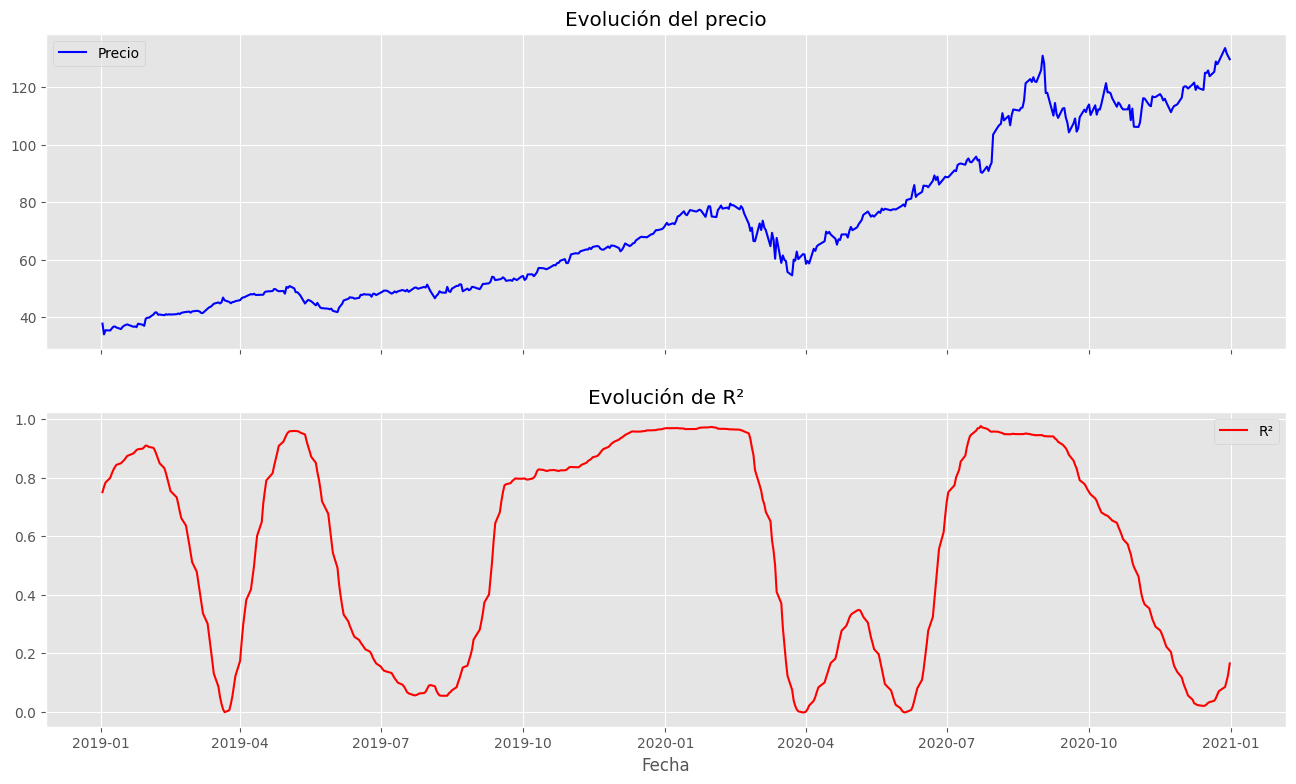

In [28]:
import matplotlib.pyplot as plt

# Seleccionar un periodo más corto (por ejemplo, 2020-2021)
start_date = "2019-01-01"
end_date = "2020-12-31"

fig, ax = plt.subplots(2, 1, figsize=(16, 9), sharex=True)
data = ds.get_data(ticker, start_date, end_date)
# Primer gráfico: Evolución de los precios
ax[0].plot(data, label="Precio", color="blue")
ax[0].set_title("Evolución del precio")
ax[0].legend()

# Segundo gráfico: R² en el mismo periodo
ax[1].plot(r2_series[start_date:end_date], label="R²", color="red")
ax[1].set_title("Evolución de R²")
ax[1].legend()

plt.xlabel("Fecha")
plt.show()

In [ ]:
ticker = "^GSPC"
print(f"⚙️  Almacenando datos de momentum para {ticker}...")
sLM.store_exponentialModel_data(ticker, ds, cache_path)


In [ ]:
print_exponentialModel_data(ticker, ds, cache_path)

In [ ]:
universe_ing_eur = ['ZPDM', 'ZPDI', 'ZPDS', 'ZPDH', 'ZPDT', 'ZPDD', 'ZPDF',
                   'SPY5', 'DJE', 'UST', 'LYTR', 'IQQH']

universe_ferrer = ['XLI', 'XLF', 'XLV', 'XLK', 'XLC', 'XLU', 'XLY', 'XLB', 'XLE', 'XLP',
                    'TLT', 'TIP', 'IEF', 'SHY', 'AGG', 'VNQ', 'GLD', 'DBC']

for ticker in universe_ferrer:
    sLM.store_exponentialModel_data(ticker, ds, cache_path)